## Convert imaging data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from showit import image

In [3]:
from mesoscope.preprocess import loadImages
from mesoscope.utils import normalize

In [4]:
from os.path import join, exists
from os import makedirs
from json import dump

###Set directory and session information

In [5]:
base = '/tier2'
base = '/Volumes'
directory = base + '/freeman/Nick/lfov.calibration'

## Load data

In [6]:
key = '2016-05-15'
name = '5002-L23'
prefix = 'stack'
path = join(directory, 'unprocessed', 'images', key, name)
name = '5002-test'
print path
print exists(path)

/Volumes/freeman/Nick/lfov.calibration/unprocessed/images/2016-05-15/5002-L23
True


In [7]:
meta, data = loadImages(path + '/' + prefix + '*', engine = None)

In [8]:
data

Images
mode: local
dtype: int16
shape: (1, 25, 464, 576)

In [9]:
meta

{'averaging': 5,
 'depths': [0,
  25,
  50,
  75,
  100,
  125,
  150,
  175,
  200,
  225,
  250,
  275,
  300,
  325,
  350,
  375,
  400,
  425,
  450,
  475,
  500,
  525,
  550,
  575,
  600],
 'nplanes': 25,
 'nrois': 1,
 'power': 8,
 'rois': [{'center': [-0.0073318823644499759, 3.8857805866250004e-16],
   'depths': 0.0,
   'npixels': [576.0, 464.0],
   'size': [5.4801645840899988, 4.4100000000000001]}],
 'shape': (1, 25, 464, 576),
 'volumeRate': 4.558404558}

## Inspect data

In [10]:
mean = data.mean().toarray()

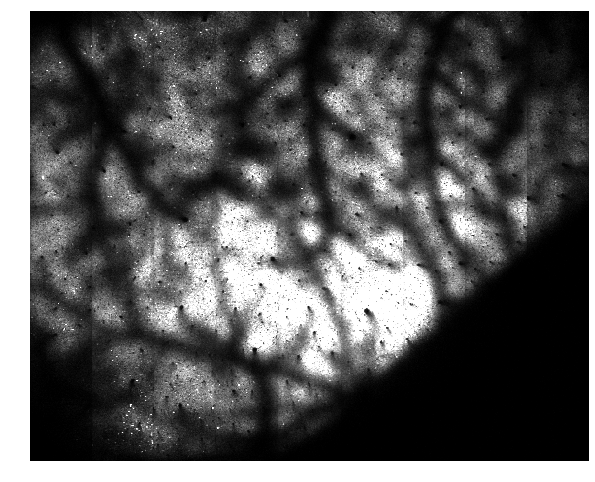

In [11]:
img = mean[10]
image(img, clim=(0, 3.5*img.mean()), size = 10);

##Save binary images

In [12]:
savepath = join(directory, 'reprocessed', name, key, 'images')
if not exists(savepath):
    makedirs(savepath)

In [13]:
data.tobinary(savepath, overwrite=True)

##Save summary data

###Meta data

In [14]:
savepath = join(directory, 'reprocessed', name, key, 'summary')
if not exists(savepath):
    makedirs(savepath)

In [15]:
with open(savepath + '/meta-' + prefix + '.json', 'w') as fid:
    dump(meta, fid, indent=2)

###Raw tiffs

In [16]:
from skimage.io import imsave

In [17]:
imsave(savepath+'/raw-' + prefix + '.tif', mean.astype('float32'), plugin='tifffile', photometric='minisblack')

###Normalized tiffs

In [18]:
norm = normalize(mean).astype('float32')
#norm = data.map(normalize)

In [19]:
imsave(savepath+'/raw-norm-' + prefix + '.tif', norm, plugin='tifffile', photometric='minisblack')